In [1]:
import sys
sys.path.insert(0, "/Users/alexanderholstrup/git/VisualPlaceRecognition/cnnimageretrieval-pytorch")

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import h5py


from cirtorch.utils.view_angle import field_of_view, ious, plot_fov
%matplotlib inline

In [3]:
city = 'zurich'

q_postproc = pd.read_csv(f'/Users/alexanderholstrup/git/VisualPlaceRecognition/cnnimageretrieval-pytorch/notebooks/data/IT5/MSEAndContrastive400/Train/Images/{city}/query/postprocessed.csv')
q_raw = pd.read_csv(f'/Users/alexanderholstrup/git/VisualPlaceRecognition/cnnimageretrieval-pytorch/notebooks/data/IT5/MSEAndContrastive400/Train/Images/{city}/query/raw.csv')

db_postproc = pd.read_csv(f'/Users/alexanderholstrup/git/VisualPlaceRecognition/cnnimageretrieval-pytorch/notebooks/data/IT5/MSEAndContrastive400/Train/Images/{city}/database/postprocessed.csv')
db_raw = pd.read_csv(f'/Users/alexanderholstrup/git/VisualPlaceRecognition/cnnimageretrieval-pytorch/notebooks/data/IT5/MSEAndContrastive400/Train/Images/{city}/database/raw.csv')

In [4]:
with h5py.File('/Users/alexanderholstrup/Downloads/zurich_gt.h5', "r") as f:
    binary_similarity=f["sim"][:]
    graded_similarity=f["fov"][:]

In [5]:
N_q, N_db = np.shape(binary_similarity)
print(f'Query images: {N_q}\nDatabase images: {N_db}')

Query images: 2193
Database images: 2991


[466834.91774730646, 5244141.584587626, 147.0]
===> 0 / 50
[466843.6709491731, 5244130.732788808, 146.0]
===> 1 / 50
[466850.1060785004, 5244118.660449268, 147.0]
===> 2 / 50
[466858.22140139283, 5244107.1899030665, 145.0]
===> 3 / 50
[466869.8605559218, 5244087.053109547, 145.0]
===> 4 / 50
[466876.7268359379, 5244077.756784294, 144.0]
===> 5 / 50
[466882.1278832188, 5244068.468714763, 145.0]
===> 6 / 50
[466889.2097355693, 5244058.548827327, 147.0]
===> 7 / 50
[466902.321295728, 5244039.637430173, 146.0]
===> 8 / 50
[466909.3904767411, 5244028.795207129, 149.0]
===> 9 / 50
[466914.99616668076, 5244018.272404257, 151.0]
===> 10 / 50
[466921.4471255747, 5244008.967355552, 148.0]
===> 11 / 50
[466928.5031312278, 5243994.424388118, 149.0]
===> 12 / 50
[466935.1483216641, 5243982.039784886, 149.0]
===> 13 / 50
[466942.0026535061, 5243970.576446836, 149.0]
===> 14 / 50
[466948.239414416, 5243959.427768298, 151.0]
===> 15 / 50
[457614.7224921761, 5244246.183668192, 214.2671451391741]
===> 1

(array([ 1.,  1.,  1.,  5.,  6.,  9., 15.,  7.,  2.,  2.]),
 array([-0.13430745, -0.12781108, -0.12131472, -0.11481835, -0.10832199,
        -0.10182562, -0.09532926, -0.08883289, -0.08233653, -0.07584016,
        -0.0693438 ]),
 <BarContainer object of 10 artists>)

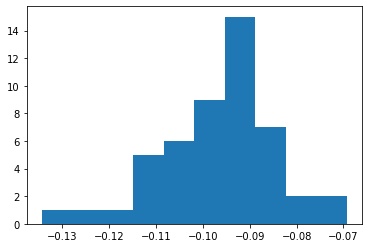

In [6]:
difference = []
N = min(50, N_q)
Start = 0
for i in range(Start, Start+N):
    gps = q_postproc.iloc[[i]].values[0][2:4].tolist()
    ca = q_raw.iloc[[i]].values[0][4]
    q_coor = gps + [ca]
    print(q_coor)
    db_coors = []
    points = [q_coor]
    for j in range(N_db):
        gps = db_postproc.iloc[[j]].values[0][2:4].tolist()
        ca = db_raw.iloc[[j]].values[0][4]
        db_coor = gps + [ca]
        points.append(db_coor)
    pol = field_of_view(points, approximation=25)
    calc_ious = np.array(ious(pol[0], pol[1:]))
    grad_ious = np.array(graded_similarity[i, :])

    difference.append(np.sum(calc_ious - grad_ious) / np.size(calc_ious[calc_ious != 0]))
    print(f'===> {i} / {Start+N}')
plt.hist(difference)

Text(0.5, 0, 'Difference between precomputed IoU and our IoU')

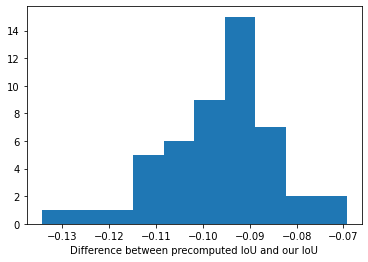

In [7]:
plt.hist(difference)
plt.xlabel('Difference between precomputed IoU and our IoU')